In [ ]:
from google.colab import drive
import os
import glob
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/MLDcw/ergasia MLD qmul'
os.listdir(path)
print(path)

/content/drive/MyDrive/MLDcw/ergasia MLD qmul


In [ ]:
sample_path = '/content/drive/MyDrive/MLDcw/ergasia MLD qmul/ANGER/*.jpg'
files = glob.glob(sample_path)
len(files)

8228

In [ ]:
Classes = ['ANGER','SURPRISE', 'FEAR', 'HAPPINESS', 'DISGUST', 'SADNESS']
Datadirectory = path
img_size =128

In [ ]:
import cv2 as cv2
training_Data = [] ## data



def create_training_Data():
  for category in Classes:
    path = os.path. join(Datadirectory, category)
    class_num = Classes.index(category) ## 0 1,## Label
    for img in os.listdir (path) :
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array= cv2.resize(img_array, (img_size,img_size))
        training_Data.append([new_array,class_num])
      except Exception as e:
        pass

In [ ]:
create_training_Data()

In [ ]:
classes = ['ANGER','SURPRISE', 'FEAR', 'HAPPINESS', 'DISGUST', 'SADNESS']
root_dir = path

In [ ]:
import numpy as np
import os
import shutil

In [ ]:
new_root = 'data'
root_dir1 = "/content/drive/MyDrive/MLDcw/"

In [ ]:
root_dir1 + new_root+'/train/'+classes[0]

'/content/drive/MyDrive/MLDcw/data/train/ANGER'

In [ ]:
for cls in classes:

    src = root_dir + '/' + cls # folder to copy images from

    print(src)

    allFileNames = os.listdir(src)

    np.random.shuffle(allFileNames)



    ## here 0.75 = training ratio , (0.95-0.75) = validation ratio , (1-0.95) =  

    ##training ratio  

    train_FileNames,val_FileNames,test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*0.70),int(len(allFileNames)*0.85)])



    # #Converting file names from array to list



    train_FileNames = [src+'/'+ name for name in train_FileNames]

    val_FileNames = [src+'/' + name for name in val_FileNames]

    test_FileNames = [src+'/' + name for name in test_FileNames]



    print('Total images  : '+ cls + ' ' +str(len(allFileNames)))

    print('Training : '+ cls + ' '+str(len(train_FileNames)))

    print('Validation : '+ cls + ' ' +str(len(val_FileNames)))

    print('Testing : '+ cls + ' '+str(len(test_FileNames)))    

    

    ## Copy pasting images to target directory
    for name in train_FileNames:

        shutil.copy(name, root_dir1 + new_root+'/train/'+cls )




    for name in val_FileNames:

        shutil.copy(name, root_dir1 +new_root+'/val/'+cls )

    for name in test_FileNames:

        shutil.copy(name,root_dir1 + new_root+'/test/'+cls )

/content/drive/MyDrive/MLDcw/ergasia MLD qmul/ANGER
Total images  : ANGER 8229
Training : ANGER 5760
Validation : ANGER 1234
Testing : ANGER 1235
/content/drive/MyDrive/MLDcw/ergasia MLD qmul/SURPRISE
Total images  : SURPRISE 7419
Training : SURPRISE 5193
Validation : SURPRISE 1113
Testing : SURPRISE 1113
/content/drive/MyDrive/MLDcw/ergasia MLD qmul/FEAR
Total images  : FEAR 2986
Training : FEAR 2090
Validation : FEAR 448
Testing : FEAR 448
/content/drive/MyDrive/MLDcw/ergasia MLD qmul/HAPPINESS
Total images  : HAPPINESS 9114
Training : HAPPINESS 6379
Validation : HAPPINESS 1367
Testing : HAPPINESS 1368
/content/drive/MyDrive/MLDcw/ergasia MLD qmul/DISGUST
Total images  : DISGUST 2652
Training : DISGUST 1856
Validation : DISGUST 398
Testing : DISGUST 398
/content/drive/MyDrive/MLDcw/ergasia MLD qmul/SADNESS
Total images  : SADNESS 13041
Training : SADNESS 9128
Validation : SADNESS 1956
Testing : SADNESS 1957


In [ ]:
import tensorflow

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

In [ ]:
image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2
)    

training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory='/content/drive/MyDrive/MLDcw/data/train',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
                                                color_mode = "grayscale",
                                               # featurewise_center=True,
                                               # featurewise_std_normalization=True
                                                )
validation_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory='/content/drive/MyDrive/MLDcw/data/val',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
                                                 color_mode = "grayscale"
                                                  
                                                 )
testing_set = image_generator.flow_from_directory(batch_size = 128,
                                                  directory = '/content/drive/MyDrive/MLDcw/data/test',
                                                  shuffle = True,
                                                  target_size=(48, 48),
                                                  class_mode = 'categorical',
                                                  color_mode = "grayscale"
                                                  )

# #final data set
# new_data = image_generator.flow_from_directory(batch_size=128,
#                                                  directory='/content/drive/MyDrive/MLDcw/data/new_d',
#                                                  shuffle=True,
#                                                  target_size=(48, 48), 
#                                                  class_mode='categorical',
#                                                  color_mode = "grayscale"
#                                                  )                          

Found 32114 images belonging to 6 classes.
Found 6516 images belonging to 6 classes.
Found 6516 images belonging to 6 classes.


In [ ]:
training_set.class_indices

{'ANGER': 0,
 'DISGUST': 1,
 'FEAR': 2,
 'HAPPINESS': 3,
 'SADNESS': 4,
 'SURPRISE': 5}

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
    
model.add(Conv2D(256,(3,3), padding='same', activation='relu')) #kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same', activation='relu'))# kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.25))
    

model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))

model.compile(
    optimizer = "adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
hist1 = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
126/126 [==============================] - 1291s 10s/step - loss: 0.6498 - accuracy: 0.7906 - val_loss: 1.9439 - val_accuracy: 0.3002
Epoch 2/5
126/126 [==============================] - 1270s 10s/step - loss: 0.1871 - accuracy: 0.9406 - val_loss: 4.2869 - val_accuracy: 0.0688
Epoch 3/5
126/126 [==============================] - 1272s 10s/step - loss: 0.0688 - accuracy: 0.9777 - val_loss: 3.9406 - val_accuracy: 0.0758
Epoch 4/5
126/126 [==============================] - 1271s 10s/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.5934 - val_accuracy: 0.7865
Epoch 5/5
126/126 [==============================] - 1270s 10s/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.0982 - val_accuracy: 0.9664


In [ ]:
hist1 = hist1.history

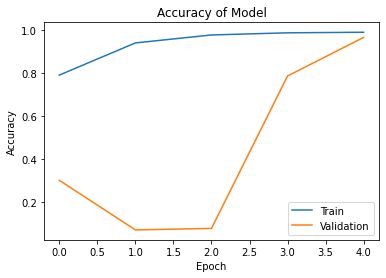

In [ ]:
plt.plot(hist1["accuracy"])
plt.plot(hist1["val_accuracy"])
plt.title("Accuracy of Model")
plt.legend(["Train","Validation"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig("CNNv2_accuracy.png")

In [ ]:
hist_deployment = model.evaluate(testing_set)

51/51 [==============================] - 67s 1s/step - loss: 0.1051 - accuracy: 0.9650


In [ ]:
from zipfile import ZipFile
ZipFile("/content/drive/MyDrive/MLDcw/assignment_2_MLD_qmul.zip").extractall("/content/drive/MyDrive/MLDcw/data/prod")

In [ ]:
new_data = image_generator.flow_from_directory(batch_size=128,
                                                 directory='/content/drive/MyDrive/MLDcw/data/prod/assignment_2_MLD_qmul',
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
                                                 #color_mode = "grayscale"
                                                 )                

Found 26124 images belonging to 6 classes.


In [ ]:
hist_prod = model.evaluate(new_data)

205/205 [==============================] - 282s 1s/step - loss: 0.5586 - accuracy: 0.8246


In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model1.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
    
model1.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten()) 
model1.add(Dense(256,activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
    

model1.add(Dense(512,activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))

model1.add(Dense(6, activation='softmax'))

model1.compile(
    optimizer = "adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
hist2 = model1.fit_generator(training_set, validation_data = validation_set , epochs = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
126/126 [==============================] - 9091s 72s/step - loss: 5.3627 - accuracy: 0.6805 - val_loss: 5.4919 - val_accuracy: 0.3002
Epoch 2/5
126/126 [==============================] - 1788s 14s/step - loss: 1.5929 - accuracy: 0.8754 - val_loss: 5.8706 - val_accuracy: 0.3002
Epoch 3/5
126/126 [==============================] - 1812s 14s/step - loss: 1.0165 - accuracy: 0.9470 - val_loss: 5.0206 - val_accuracy: 0.3003
Epoch 4/5
126/126 [==============================] - 1831s 15s/step - loss: 0.9230 - accuracy: 0.9624 - val_loss: 1.5199 - val_accuracy: 0.8086
Epoch 5/5
126/126 [==============================] - 1827s 15s/step - loss: 0.7870 - accuracy: 0.9657 - val_loss: 1.2211 - val_accuracy: 0.8582


In [ ]:
hist2 = hist2.history

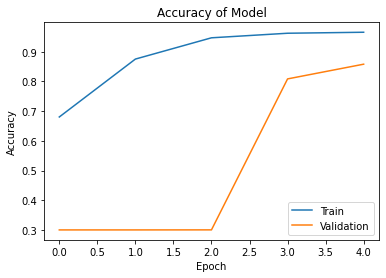

In [ ]:
plt.plot(hist2["accuracy"])
plt.plot(hist2["val_accuracy"])
plt.title("Accuracy of Model")
plt.legend(["Train","Validation"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig("CNNv2_accuracy.png")

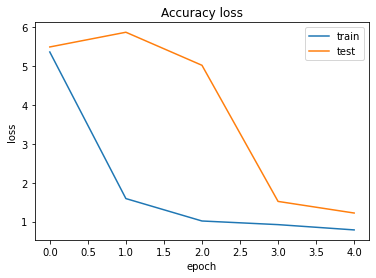

In [ ]:
plt.plot(hist2["loss"])
plt.plot(hist2["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("vgg19v2_loss.png")